In [2]:
from google.colab import files
upload=files.upload()

Saving Symptom2Disease.csv to Symptom2Disease.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
data = pd.read_csv('Symptom2Disease.csv')

In [7]:
print(data)

      Unnamed: 0      label                                               text
0              0  Psoriasis  I have been experiencing a skin rash on my arm...
1              1  Psoriasis  My skin has been peeling, especially on my kne...
2              2  Psoriasis  I have been experiencing joint pain in my fing...
3              3  Psoriasis  There is a silver like dusting on my skin, esp...
4              4  Psoriasis  My nails have small dents or pits in them, and...
...          ...        ...                                                ...
1195         295   diabetes  I'm shaking and trembling all over. I've lost ...
1196         296   diabetes  Particularly in the crevices of my skin, I hav...
1197         297   diabetes  I regularly experience these intense urges and...
1198         298   diabetes  I have trouble breathing, especially outside. ...
1199         299   diabetes  I constantly sneeze and have a dry cough. My i...

[1200 rows x 3 columns]


In [8]:
data.drop(columns=["Unnamed: 0"], inplace=True)
data

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [10]:
data.isnull().sum()

,0
label,0
text,0


In [11]:
data.value_counts()


label                    text                                                                                                                                                                                                                 
Jaundice                 I've been feeling extremely scratchy, sick, and worn out. In addition, I've lost weight and have a temperature. My urine is dark, and my skin has turned yellow. Additionally, I have been experiencing stomach pain.    4
Dimorphic Hemorrhoids    I've been constipated and it's really hard to go to the bathroom. When I do go, it hurts and my stool has been bloody. I've also been having some pain in my butt and my anus has been really itchy and irritated.       3
Arthritis                I've been feeling really weak in my muscles and my neck has been really stiff. My joints have been swelling up and it's hard for me to move around without feeling stiff. Walking has been really painful too.           3
Pneumonia                I have a really high fever, and I have problems breathing. My heart is racing quite quickly, I'm perspiring a lot, and I feel chilly and exhausted. I'm also about to cough out some brownish phlegm.                    2
                         I'm having a hard time breathing and I feel really uncomfortable. I'm sweating a lot and there's a lot of phlegm in my throat. My chest hurts and my heart is beating fast. The mucus I'm coughing up is brownish.       2
                                                                                                                                                                                                                                                 ..
urinary tract infection  I have to use the restroom frequently, yet only a few drops of pee are usually produced. My stomach aches a lot, and I can't seem to control the desire to urinate.                                                      1
                         I need to relieve myself regularly, but I can't seem to get my bladder to empty. On sometimes, I get intense, uncontrollable urges to urinate, along with dark or red urine.                                             1
                         I noticed blood in my urinating. I occasionally feel sick after urinating. I frequently feel as though I have a fever.                                                                                                   1
                         I occasionally urinate with blood in it and feel a little queasy. Help! I also occasionally get horrible pee odours and excessive overnight temps.                                                                       1
                         I occasionally urinate with blood in it and occasionally feel queasy while doing so. Help! I also occasionally get high temps at night and have a terrible odour coming from my pee.                                     1
Name: count, Length: 1153, dtype: int64

In [12]:
labels = data['label']  # Contains the labels or categories associated with the text data
symptoms = data['text']  # Contains the textual data (e.g., symptoms, sentences) for analysis


In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())
    # Removing stopwords and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [19]:
preprocessed_symptoms = symptoms.apply(preprocess_text)

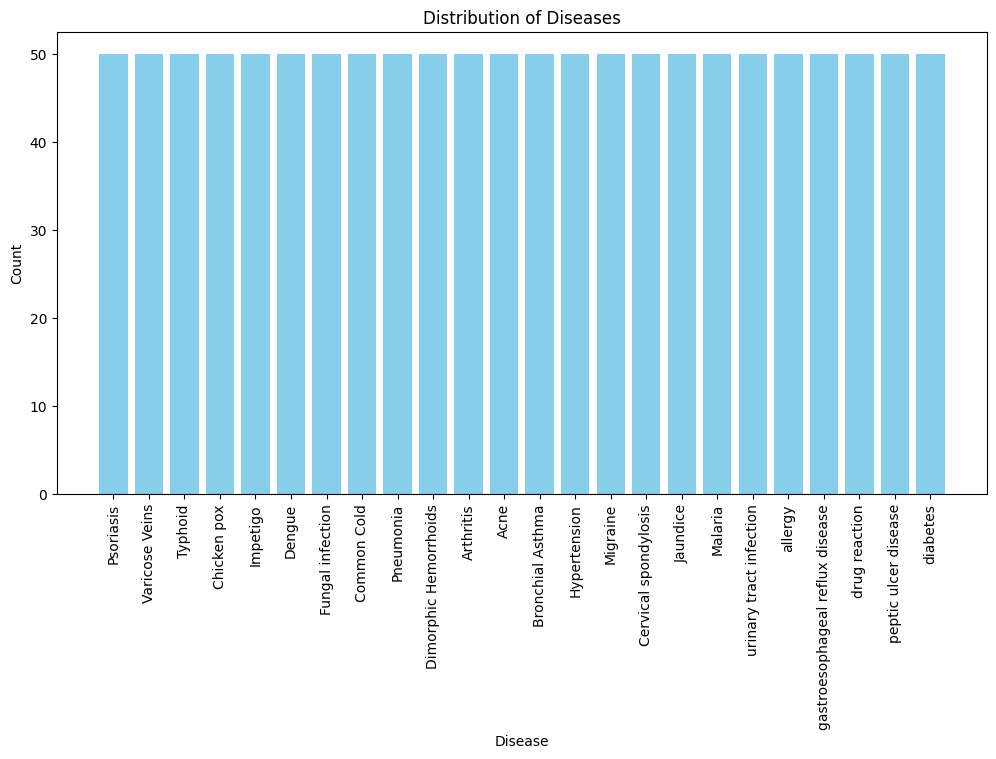

In [20]:
import matplotlib.pyplot as plt

# Count the occurrences of each disease
disease_counts = data['label'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(12, 6))
plt.bar(disease_counts.index, disease_counts.values, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Diseases')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Feature Extraction using TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=1500)  # You can adjust max_features based on your dataset size
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_symptoms).toarray()

In [22]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=42)

In [23]:
# KNN Model Training

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) based on your dataset
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
predictions = knn_classifier.predict(X_test)

In [30]:
# Model Evaluation

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))

Accuracy: 0.95
                                 precision    recall  f1-score   support

                           Acne       0.88      1.00      0.93         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       0.85      1.00      0.92        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.80      1.00      0.89        12
                    Common Cold       1.00      0.83      0.91        12
                         Dengue       0.92      0.92      0.92        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
                        Malaria    

In [58]:
# Example Usage
symptom = "frequent urination, extreme hunger"

# Preprocess the input symptom
preprocessed_symptom = preprocess_text(symptom)

# Transform the preprocessed symptom using the same vectorizer used during training
symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])

# Predict the disease
predicted_disease = knn_classifier.predict(symptom_tfidf)
print(f'Predicted Disease: {predicted_disease[0]}')

Predicted Disease: diabetes


In [60]:
import joblib

# Save the trained KNN model
joblib.dump(knn_classifier, 'knn_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']